## Monte Carlo Prediction to estimate state action values
Monte Carlo methods work by learning from samples of experience.
In Prediction, we just have to estimate the value for each state.

On Policy model-free estimation of the value function.

In [3]:
import gym
import matplotlib
import numpy as np
import sys
from collections import defaultdict
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')
env = BlackjackEnv()

## About Blackjack

Player plays against the dealer.

State space: 200 states

Action Space:

    "Stick": Stop receiving cards from the dealer
    
    "Twist": Take another card from the dealer
    
Reward for Stick:

    +1 if sum of cards > sum of dealer's cards
    
    0 if same sum
    
    -1 if sum of cards < sum of dealer's cards

Reward for Twist

    -1 if sum of cards > 21 (terminate)

    0 otherwise
    


In [12]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    # The final value function
    V = defaultdict(float)
    
    for i_episode in range(1, num_episodes + 1):
        if i_episode % 1000 == 0:
            print("\rEpisode {}/{} ".format(i_episode, num_episodes), end="")
            sys.stdout.flush()
            
        #an episode is an array of (state, action, reward) tuples
        episode = []
        state = env.reset()
        #get 100 samples
        for t in range(100):
            action = policy(state)
            next_state, reward, done, _ = env.step(action)
            episode.append((state, action, reward))
            if done:
                break
            state = next_state
        
        states_in_episode = set([tuple(x[0]) for x in episode])
        for state in states_in_episode:
            #find the first occurence of state
            first_occurence_idx = next(i for i, x in enumerate(episode) if x[0] == state)
            #sum of all rewards since the first occurence of state
            G = sum([x[2]*(discount_factor**i) for i, x in enumerate(episode[first_occurence_idx:])])
            
            #Calculate average return for this state over all sample episodes
            returns_sum[state] += G
            returns_count[state] += 1.0
            V[state] = returns_sum[state] / returns_count[state]
            
        return V
    

In [13]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is >= 20 and hits otherwise: Deterministic
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

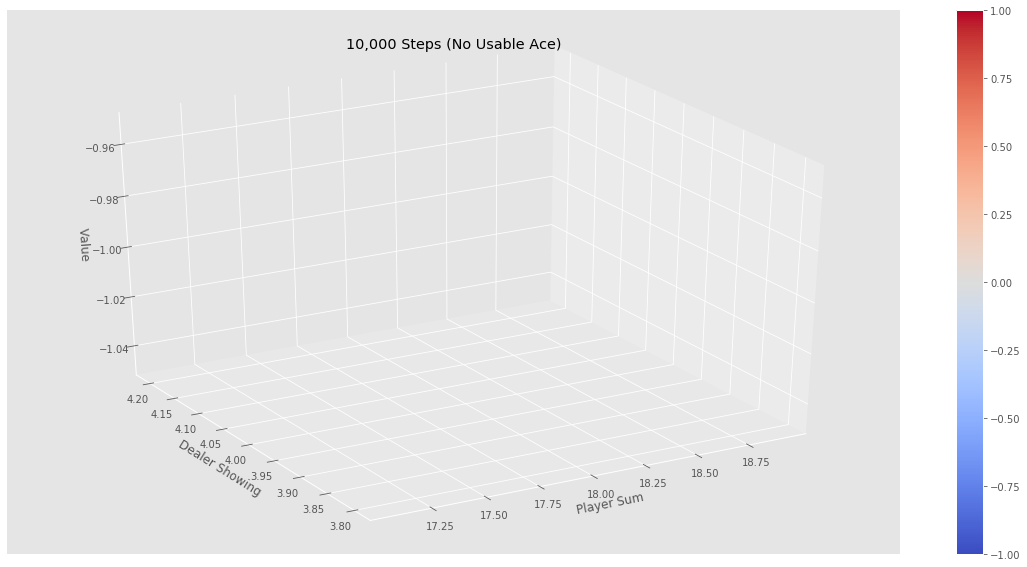

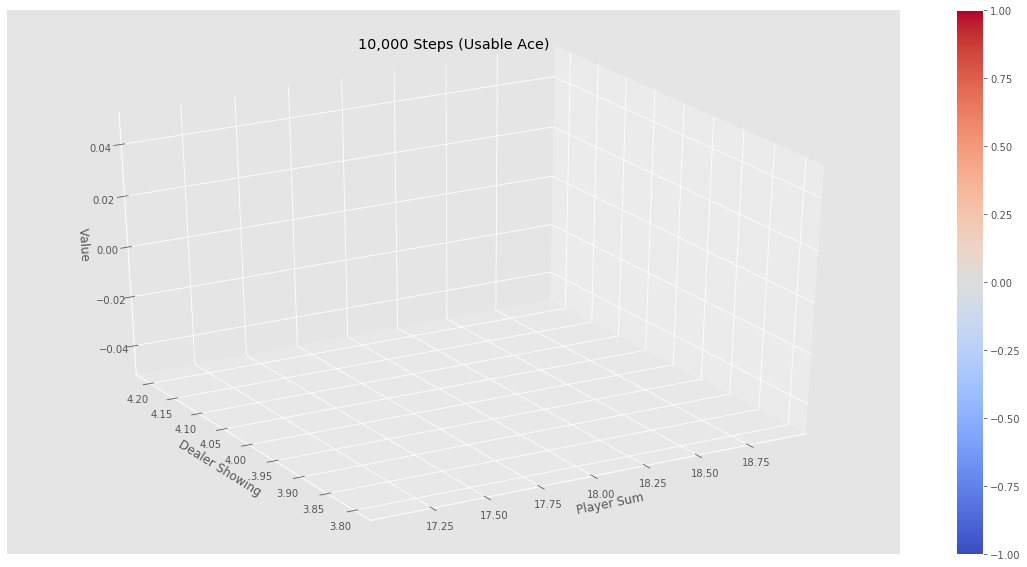

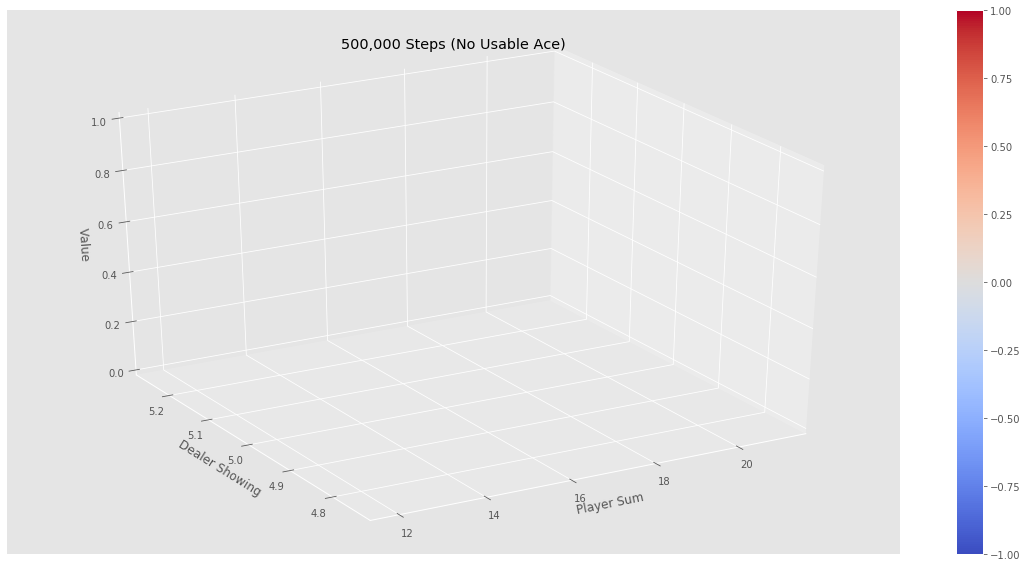

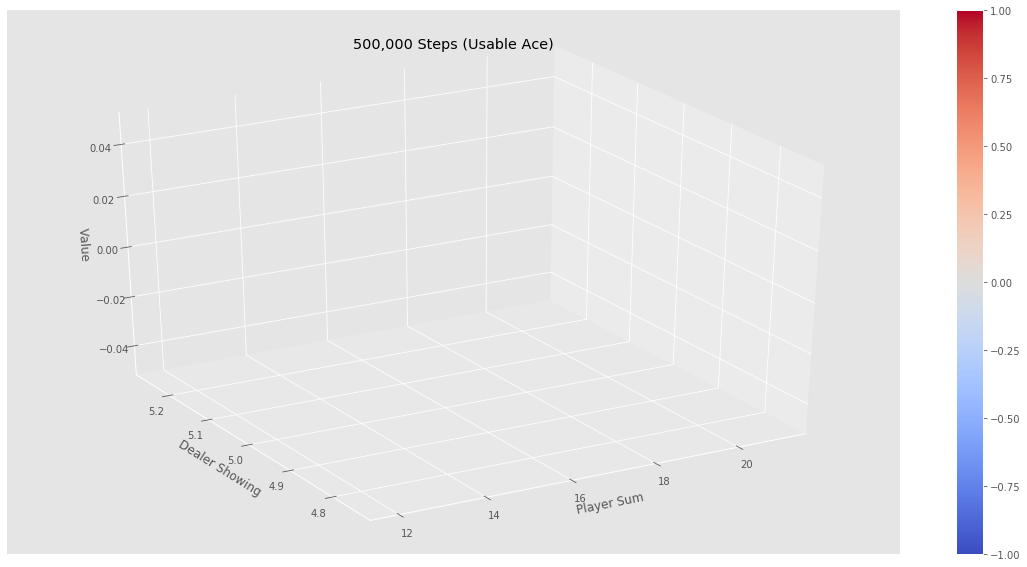

In [14]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")